# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will perform. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1 to compute the hypothesis, the gradient of the cost function, and the cost function. This code will then be used by the next section of the workbook.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## hypothesis computes $h_theta$
def hypothesis(theta, X):
  return X@theta

## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
  m = list(y.size())[0]
  grad = X.t() @ (hypothesis(theta, X) - y) / m
  return grad
    
## cost_func computes
def cost_func(theta, X, y):
  num_thetas = list(theta.size())[1]
  J = torch.zeros(num_thetas)
  y_size = list(y.size())[0]
  for i in range(num_thetas):
    MSE = hypothesis(theta[:,i:i+1], X) - y
    MSE = MSE ** 2
    MSE = torch.sum(MSE)
    J[i] = MSE / (2*y_size)
  return J

## Now we'd like to compare how stochastic gradient descent (SGD), SGD with momentum, and ADAM will run over weight updates. Complete the defined functions below and make sure to add the parameters which may need to be passed into the functions as well. Plot the weight updates over the contour plot using varying colours. Note, for clarity, you may only want to plot some of the updates.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


TypeError: ignored

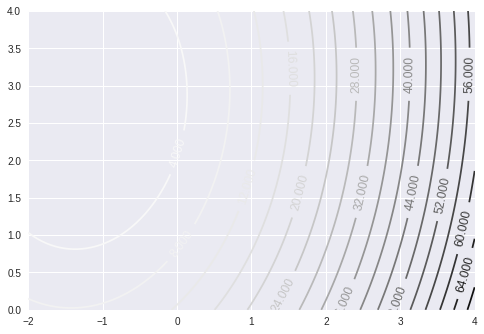

In [6]:
import numpy as np

def weightupdate_adam(count, X, y,theta, alpha, beta_1, beta_2):
    
    theta_list, theta = weightupdate_sgd_momentum(count, X, y, theta, alpha, beta_1) 
    weight_list = []
    m, v, w = 0, 0, 0
    
    for i in range(0, count):
      
      mome = beta_1 * m + (1 - beta_1) * theta_list[i]
      velo = beta_2 * v + (1 - beta_2) * np.power(theta_list[i],2)
      
      mome_hat = mome/ ( 1 - np.power(beta_1, i))
      velo_hat = velo / (1 - np.power(beta_2, i))
      
      w = w - alpha * mome_hat / (np.sqrt(velo_hat) + alpha)
      weight_list.append(w)
      
    return weight_list


def weightupdate_sgd_momentum(count, X, y, theta, alpha, beta):
    
    theta_list = []
    theta_list.append(theta.numpy())
    theta_prev = theta
    velocity_prev = 0
    
    for i in range(0, count):
      
      for j in range(len(X)):
        
        idx = np.random.randint(0, X.shape[0])
        X_new = X[idx,:].reshape(1,2)
        hypo  =hypothesis(theta_prev,X_new)
        grad = X_new.t() @ (hypo-y[idx])
        
        velocity_curr = beta * velocity_prev + (1-beta)*grad
        velocity_prev = velocity_curr
        
        theta_curr = theta_prev - alpha * velocity_curr
        theta_list.append(theta_curr.numpy())
        theta_prev = theta_curr
        
    return theta_list, theta_curr                     
    


def weigthupdate_sgd(count, X, y, theta, alpha):
    
    theta_list = []
    theta_list = torch.Tensor(count,  len(X))
    
    theta_prev = theta
    
    for i in range(0, count):
      
      for j in range(len(X)):
        
        idx = np.random.randint(0, X.shape[0])
        X_new = X[idx,:].reshape(1,2)
        grad = X_new.t() * (hypothesis(theta_prev, X_new)-y[idx])
        theta_curr = theta_prev - alpha * grad
        theta_list[i, j] = theta_curr
        theta_prev = theta_curr
        
    return theta_list.numpy(), theta_curr
    

N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) 

theta_0 = weightupdate_adam(N, X, y,theta_0, alpha, beta_1, beta_2)



theta_0_vals = np.linspace(-2,4,100)
theta_1_vals = np.linspace(0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)
J = np.zeros((100,100))

for t0, theta_0 in enumerate(theta_0_vals):
  
  for t1, theta_1 in enumerate(theta_1_vals):
    
    thetas = torch.tensor([[theta_1],[ theta_0]])
    J[t0,t1] = cost_func(thetas, X,y)
xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)
plt.clabel(contours)
theta_list, theta_new = weigthupdate_sgd(N, X, y, theta_0, alpha)

plt.plot(theta_list[:,1], theta_list[:,0])